# Assignment 07 - [30 points]

## <u>Case Study</u>: Wine Dataset Analysis

Suppose that you are chemist who is interested in studying the properties of different types of wine. The data contained in the **wine_corrupted.csv** file contains the results of a chemical analysis of 178 types of wines grown in the same region in Italy but derived from three different cultivars. The cultivar is listed in the 'Wine Class' column. The analysis determined the numerical quantities of 13 constituents found in each of the three types of wines.

**Furthermore, suppose that you have a strong suspicion that some of the value measurements in this dataset have been corrupted due to data entry errors.**

For *this* case study, the goal of our cluster analysis is to find the larger naturally occuring clusters in the dataset and learn more about them. *If* we find that there are outliers and noise in this dataset, then it is ok to identify them as such and leave them out of the clusters. However, if a point is not *actually* noise or an outlier, we would like for it to be considered as part of a cluster in our final clustering.



### <u>Research Questions</u>:

We would like to answer the following research questions about the dataset.
* Is this dataset clusterable? If so, how many, what are their shapes and sizes (ie. number of objects in them), and are they well-separated?
* How far apart are these clusters?
* How do these clusters associate with the wine class labels (ie. the three cultivars)? How homogeneous are the clusters with respect to the wine class labels? To what extent are the wine classes completely together in the clusters that are naturally occuring in this dataset?
* Are there noise and outliers in this dataset?
* Which clustering algorithm will be most useful in identifying the naturally occuring large clusters in the dataset?


<hr style="height:1px;border:none;color:#333;background-color:#333;" />

### Imports

In [198]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.decomposition import NMF
from sklearn.preprocessing import MinMaxScaler
import warnings
from sklearn.manifold import TSNE
warnings.simplefilter(action='ignore', category=FutureWarning)
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import seaborn as sns

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.metrics.pairwise import pairwise_distances

from sklearn.neighbors import NearestNeighbors

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


## 1. Data Pre-Processing 

This dataset does not have any missing values.

* Read the wine.csv into a dataframe.
* Create another dataframe that contains the scaled numerical variables.
* Create another dataframe that contains the scaled numerical variables and the seed class labels.

You should scale the variables by mean subtracting and dividing by the standard deviation).

In [209]:
df = pd.read_csv('wine_corrupted.csv')
df.head()

,Wine Class,Alcohol Content,Malic Acid,Ash,Alcalinity of Ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid Phenols,Proanthocyanins,Color Intensity,Hue,OD280 or OD315 of diluted wines,Proline
0,1,13.05,2.05,3.22,25.0,124,2.63,2.68,0.47,1.92,3.58,1.13,3.20,830
1,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
2,1,13.28,1.64,2.84,15.5,110,2.60,2.68,0.34,1.36,4.60,1.09,2.78,880
3,1,13.87,1.90,2.80,19.4,107,2.95,2.97,0.37,1.76,4.50,1.25,3.40,915
4,1,14.30,1.92,6.00,20.0,120,2.80,3.14,0.33,1.97,6.20,1.07,2.65,1280


In [210]:
df_copy=df.drop(['Wine Class'], axis=1)
X_stand=StandardScaler().fit_transform(df_copy)
X=pd.DataFrame(X_stand, columns=df_copy.columns)
X.head()

,Alcohol Content,Malic Acid,Ash,Alcalinity of Ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid Phenols,Proanthocyanins,Color Intensity,Hue,OD280 or OD315 of diluted wines,Proline
0,-0.064593,-0.257044,1.318068,1.653086,1.703265,0.536601,0.653312,0.871420,0.576613,-0.639377,0.179591,0.830961,0.264653
1,0.116245,0.227694,0.712585,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.000826,0.449601,-0.037874
2,0.154317,-0.625086,0.660686,-1.199622,0.720278,0.488531,0.653312,-0.176095,-0.404554,-0.198156,0.100140,0.237735,0.423878
3,0.715867,-0.391694,0.591488,-0.028510,0.509638,1.049347,0.944462,0.065639,0.296279,-0.241413,0.417944,1.113449,0.535335
4,1.125132,-0.373741,6.127336,0.151661,1.422412,0.808997,1.115136,-0.256673,0.664217,0.493956,0.060414,0.054117,1.697675


In [211]:
df_stand=X.copy()
df_stand['Wine Class']=df['Wine Class']
df_stand.head()

,Alcohol Content,Malic Acid,Ash,Alcalinity of Ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid Phenols,Proanthocyanins,Color Intensity,Hue,OD280 or OD315 of diluted wines,Proline,Wine Class
0,-0.064593,-0.257044,1.318068,1.653086,1.703265,0.536601,0.653312,0.871420,0.576613,-0.639377,0.179591,0.830961,0.264653,1
1,0.116245,0.227694,0.712585,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.000826,0.449601,-0.037874,1
2,0.154317,-0.625086,0.660686,-1.199622,0.720278,0.488531,0.653312,-0.176095,-0.404554,-0.198156,0.100140,0.237735,0.423878,1
3,0.715867,-0.391694,0.591488,-0.028510,0.509638,1.049347,0.944462,0.065639,0.296279,-0.241413,0.417944,1.113449,0.535335,1
4,1.125132,-0.373741,6.127336,0.151661,1.422412,0.808997,1.115136,-0.256673,0.664217,0.493956,0.060414,0.054117,1.697675,1


## 2. Clusterability

### 2.1. t-SNE Plots
Using 6 different perplexity values and at least two random states for each perplexity value, map this scaled numerical dataset onto a two-dimensional dataset with the t-SNE algorithm. Show your projected coordinates in a scatterplot for each combination of random states and perplexity value. Also, color code your points by the Wine Class labels.

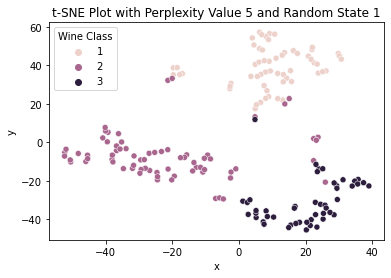

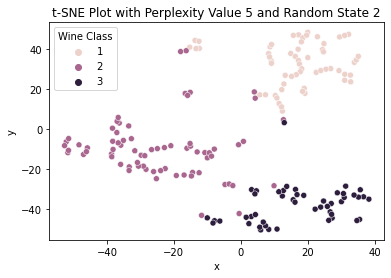

--------------------------------------------


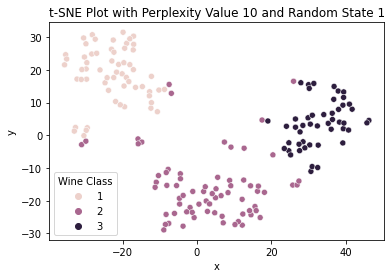

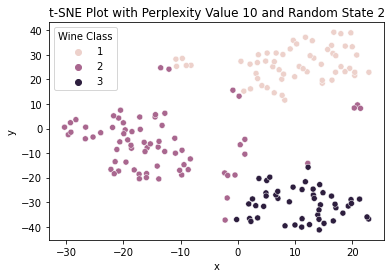

--------------------------------------------


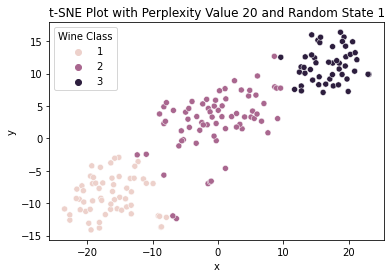

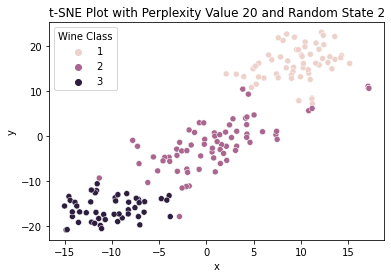

--------------------------------------------


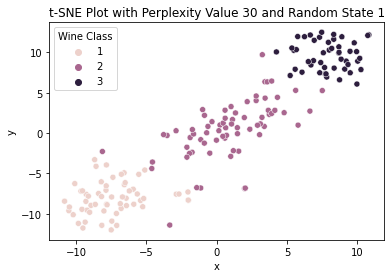

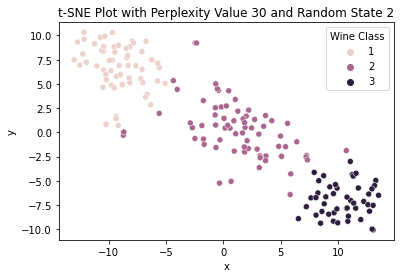

--------------------------------------------


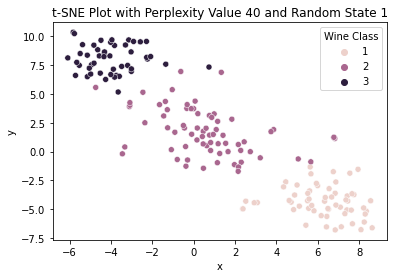

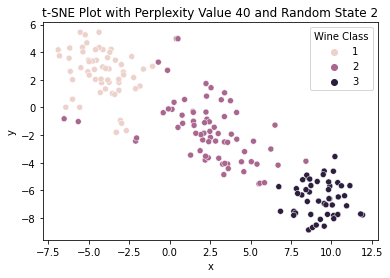

--------------------------------------------


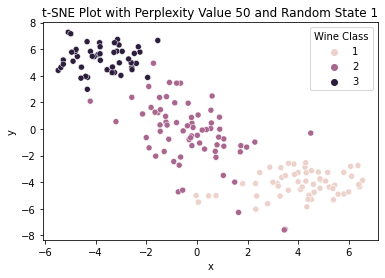

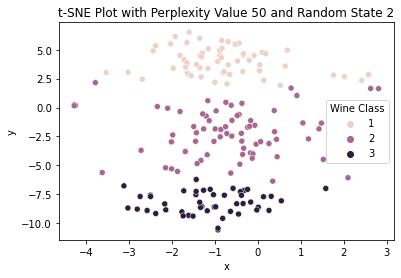

--------------------------------------------


In [202]:
for perp in [5, 10, 20, 30, 40, 50]:
    for rs in [1, 2]:
        tsne = TSNE(n_components=2, perplexity=perp, random_state=rs)
        data_tsne = tsne.fit_transform(df_stand)
        df_tsne = pd.DataFrame(data_tsne, columns=['x', 'y'])
        df_combo = pd.concat([df, df_tsne], axis=1)
        sns.scatterplot(x='x',y='y', hue='Wine Class', data=df_combo)
        plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(perp, rs))
        plt.show()
    print('--------------------------------------------')

### 2.2.  Interpretation:

Use your t-SNE plots to answer the following questions.

1. Is this dataset clusterable?
2. If so, how many clusters are in this dataset?
3. What is the shape of the clusters in this dataset?
4. Are these clusters well separated?
5. Are these clusters balanced in size?
6. Describe the relationship between the clusters suggested by the t-SNE plots and the wine classes.

Finally, pick out a random state and perplexity value that reflects the answers to your questions and show the corresponding t-SNE plot below.

### 2.2.  Answer:
1. The dataset is clusterable. By the time that we have increased the perplexity value to 20, we see 3 distinct, but no well-seperated clusters. Thus, we can interpret the t-SNE algorithm as suggesting that this dataset is clusterable. 
2. There seems to be 3 clusters in the plot of perplexity value 20 and random state 2 show below.
3. None of the clusters seems spherical, and at least one cluster seems to be non-convext.
4. Cluster 1 and 2 in the plot of perplexity value 20 and random state 2 are overlapping. So the t-SNE plot is suggesting that the clusters in the dataset are not well separated.
5. It looks like all of the three clusters have about the same number of objects in them.
6. As suggested by the t-SNE plots and wine classes, the clusters are homogeneous and one cluster corresponds with one specific wine class.


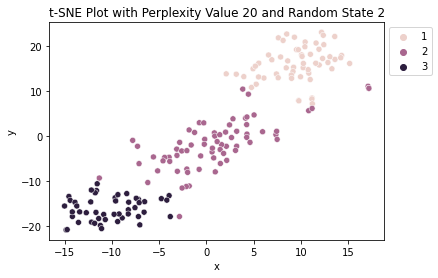

In [203]:
#Create the t-SNE plot projected coordinates
tsne = TSNE(n_components=2, perplexity=20, random_state=2)
data_tsne = tsne.fit_transform(df_stand)
df_tsne = pd.DataFrame(data_tsne, columns=['x', 'y'])
df_combo = pd.concat([df, df_tsne], axis=1)


sns.scatterplot(x='x',y='y', hue='Wine Class', data=df_combo)
plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(20, 2))
plt.legend(bbox_to_anchor=(1,1))
plt.show()

## 3. Dataset Noise Assessment

### 3.1.  Nearest Neighbor Distance Plots

For your scaled dataset, create the following 4 plots:
* k=2 nearest neighbor sorted distance plot,
* k=3 nearest neighbor sorted distance plot,
* k=4 nearest neighbor sorted distance plot,
* k=5 nearest neighbor sorted distance plot.


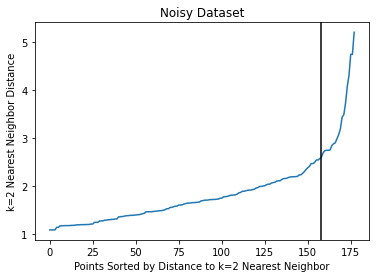

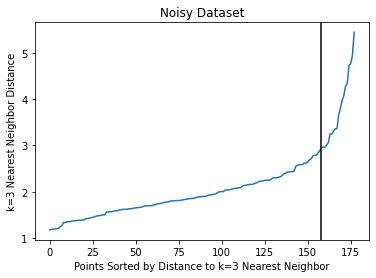

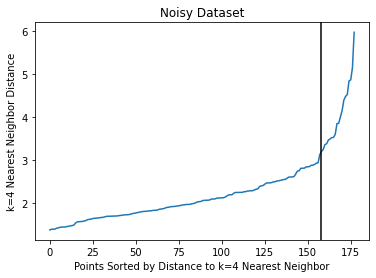

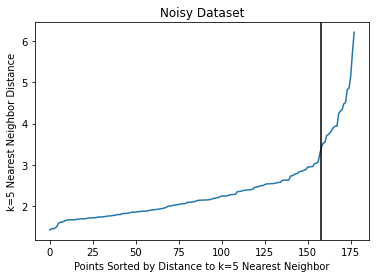

In [204]:
#Find the distance of the kth nearest neighbor
for k in range(2,6):
    nbrs = NearestNeighbors(n_neighbors=k, algorithm='ball_tree').fit(df_stand)
    distances, indices = nbrs.kneighbors(df_stand)

    plt.plot(np.sort(distances.T[k-1]))
    plt.axvline(x=158, color='black')
    plt.xlabel('Points Sorted by Distance to k=%s Nearest Neighbor'%k)
    plt.ylabel('k=%s Nearest Neighbor Distance'%k)
    plt.title('Noisy Dataset')
    plt.show()

### 3.2. Noise Assessment

Are these plots above providing a STRONG indication that there is a lot of noise in this dataset? Explain.


From the plots above, there is a strong indication that there is a lot of noise in the dataset. To be more specific, 25 observations have a much higher k-nearest neighbor distance than the rest of the 150 points.

## 4. Clustering Algorithm Selection

### 4.1. DBSCAN - Parameter Selection and Algorithm Fit

We would like to try to use DBSCAN to cluster this dataset, but first we need to determine the best parameter values for $\epsilon$ and $minpts$. For *this* case study, the goal of our cluster analysis is to find the naturally occuring clusters in the dataset and learn more about them. It is ok if not all points, whether they be outliers or noise are not included in the final clustering. But if we have a strong indication that there are not a lot of noise and outliers, then we should not expect to see too many points labeled as such in our result.

#### 4.1.1.  Clustering Evaluation Metrics





To help us select the best values for $\epsilon$ and $minpts$ in the DBSCAN algorithm, let's cluster this dataset multiple times, each time using different parameter values. 

For every combination of $minpts\in[2,3,4,5]$ and  $\epsilon\in [1.5,4.5]$, (where $\epsilon$ is evaluated a 0.25 intervals within this range), run the DBSCAN algorithm on the scaled dataset and collect the following information about the clustering:
* average silhouette score
* Calinski-Harabazs score
* the number of noise points that DBSCAN identifies
* the number of clusters that DBSCAN identifies

Then, for each **minpts** value in [2,3,4,5], create a plot that plots each of these clustering evaluation metrics for the given values of $\epsilon$.

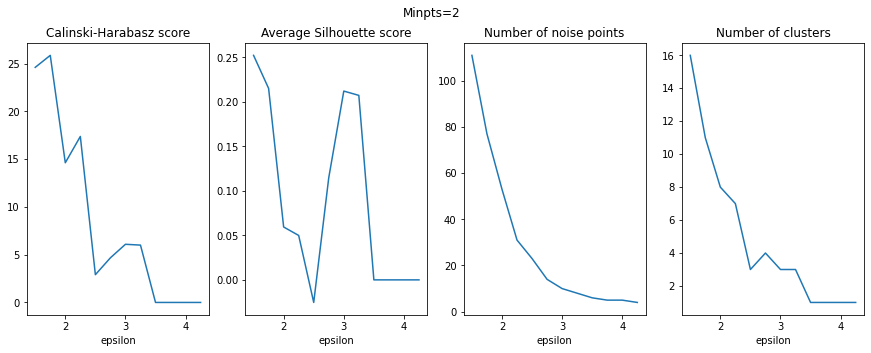

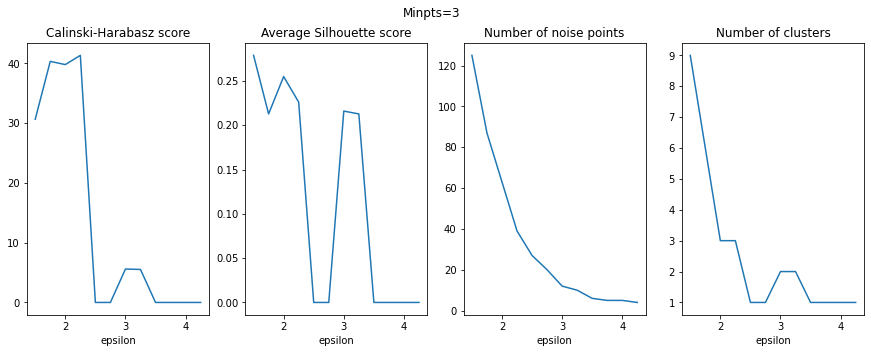

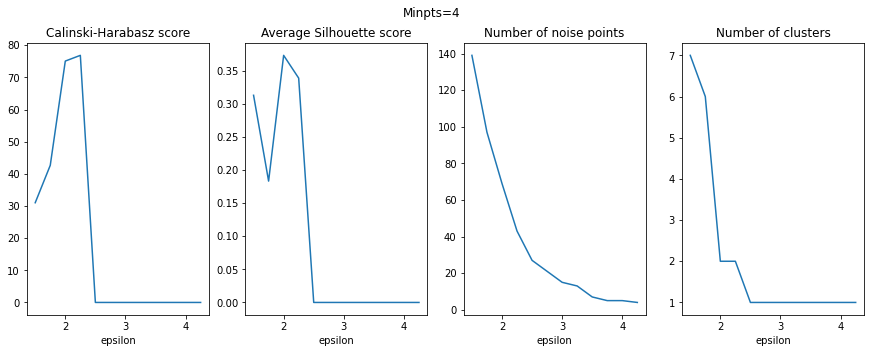

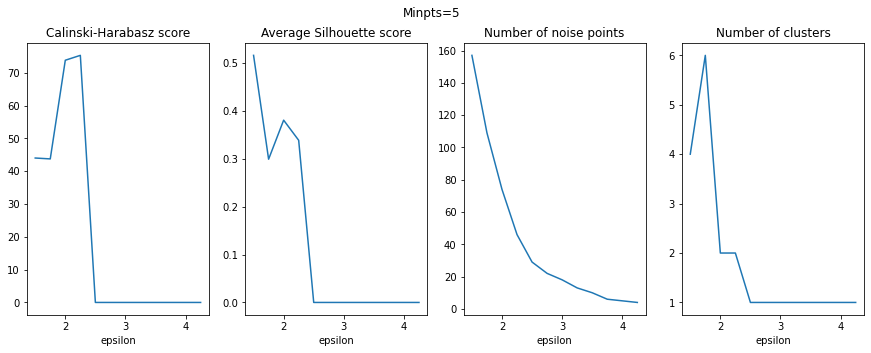

In [205]:
for minpts in [2,3,4,5]:
    calinski_harabasz_scores = []
    silhouette_scores = []
    num_clusters = []
    num_noise_points = []
    
    
    num_clusters_p = []
    n_noise_points_p = []
    silhouette_scores_p = []
    calinski_harabasz_scores_p = []
    
    for eps in np.arange(1.5, 4.5, 0.25):
        #Cluster the dataset using DBSCAN
        dst = DBSCAN(eps=eps, min_samples=minpts, metric='euclidean')
        X['predicted_cluster'] = dst.fit_predict(df_stand)
        
        #Filter out the noise points
        df_standard_no_noise = X[X['predicted_cluster'] != -1]
        
        #Get the number of clusters in the clustering
        k = len(X['predicted_cluster'].value_counts())-1
        num_clusters.append(k)
        
        #Get the number of noise points
        noise_point_num = len(X[X['predicted_cluster'] == -1])
        num_noise_points.append(noise_point_num)
        
        #Average silhouette score of the clustering
        if k > 1:
            silhouette_scores.append(silhouette_score(df_stand[X['predicted_cluster'] != -1],
                X[X['predicted_cluster'] != -1]['predicted_cluster']))
        else:
            silhouette_scores.append(0)
            
        if k > 1:
            calinski_harabasz_scores.append(calinski_harabasz_score(df_stand[X['predicted_cluster'] != -1],
                X[X['predicted_cluster'] != -1]['predicted_cluster']))
        else:
            calinski_harabasz_scores.append(0)
       
    # Show the results of the preliminary analysis
    fig, ax = plt.subplots(1, 4, figsize = (15,5), sharex = True)
    
    eps = np.arange(1.5, 4.5, 0.25)
    fig.suptitle('Minpts=%s'%minpts)
    ax[0].plot(eps, calinski_harabasz_scores)
    ax[1].plot(eps, silhouette_scores)
    ax[2].plot(eps, num_noise_points)
    ax[3].plot(eps, num_clusters)

    ax[0].set_title('Calinski-Harabasz score')
    ax[1].set_title('Average Silhouette score')
    ax[2].set_title('Number of noise points')
    ax[3].set_title('Number of clusters')
    
    ax[0].set_xlabel('epsilon')
    ax[1].set_xlabel('epsilon')
    ax[2].set_xlabel('epsilon')
    ax[3].set_xlabel('epsilon')

In [221]:
calinski_harabazs_scores = []
silhouette_scores = []
num_clusters = []
num_noise_points = []


num_clusters_p = []
n_noise_points_p = []
silhouette_scores_p = []
calinski_harabazs_scores_p = []

for eps in np.arange(1.5, 4.5, 0.25):
    #Cluster the dataset using DBSCAN
    dst = DBSCAN(eps=eps, min_samples=4, metric='euclidean')
    X['predicted_cluster'] = dst.fit_predict(df_stand)

    #Get the number of clusters in the clustering
    k=len(X['predicted_cluster'].value_counts())-1
    num_clusters.append(k)

    #Get the number of noise points
    noise_point_num=len(X[X['predicted_cluster']==-1])
    num_noise_points.append(noise_point_num)

    #Average silhouette score of the clustering
    if k>1:
        silhouette_scores.append(silhouette_score(df_stand[X['predicted_cluster']!=-1],
                                                  X[X['predicted_cluster']!=-1]['predicted_cluster']))
    else:
        silhouette_scores.append(0)
    #Calinski-Harabasz score of the clsutering
    if k>1:
        calinski_harabazs_scores.append(calinski_harabasz_score(df_stand[X['predicted_cluster']!=-1],
                                                            X[X['predicted_cluster']!=-1]['predicted_cluster']))
    else:
        calinski_harabazs_scores.append(0)

In [222]:
df_minpts_4_stats=pd.DataFrame({'epsilon': np.arange(1.5, 4.5, 0.25), 
                                'ch_score': calinski_harabazs_scores,
                                'avg_ss': silhouette_scores,
                                'noise_points': num_noise_points, 
                                'num_clusters': num_clusters})
df_minpts_4_stats

,epsilon,ch_score,avg_ss,noise_points,num_clusters
0,1.50,31.018561,0.313092,139,7
1,1.75,42.654504,0.183395,97,6
2,2.00,75.092516,0.373436,69,2
3,2.25,76.870479,0.339002,43,2
4,2.50,0.000000,0.000000,27,1
5,2.75,0.000000,0.000000,21,1
6,3.00,0.000000,0.000000,15,1
7,3.25,0.000000,0.000000,13,1
8,3.50,0.000000,0.000000,7,1
9,3.75,0.000000,0.000000,5,1


#### 4.1.2. Using t-SNE Plots

Try to find a pair of $minpts$ and $epsilon$ values for which DBSCAN will mostly identify the main k clusters suggested by the t-SNE plots. If you are unable to find a pair of parameter values that can do this, explain why this might have happened, given what you know about the clustering structure of this dataset.

<u>Hint</u>: *To test this out, you should try out many different combinations of minpts and epsilon values. Try out $minpts\in[2,3,4,5]$ and many values of $\epsilon$ in the range $[1.5,4.5]$.*

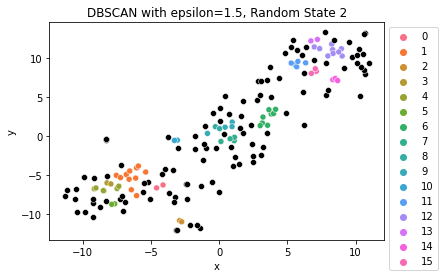

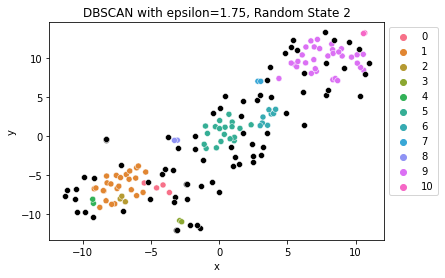

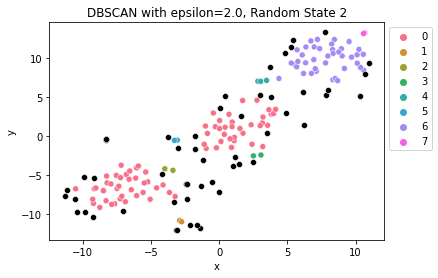

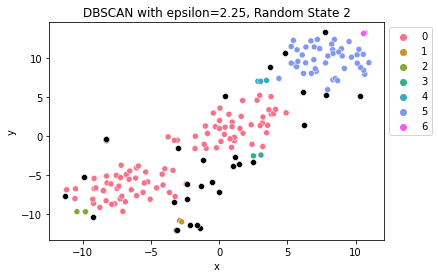

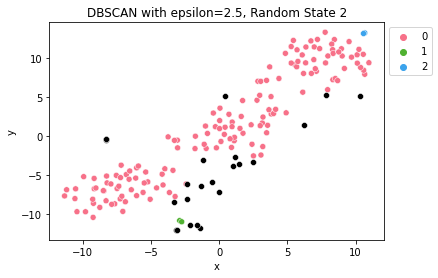

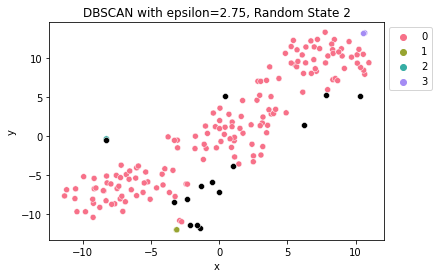

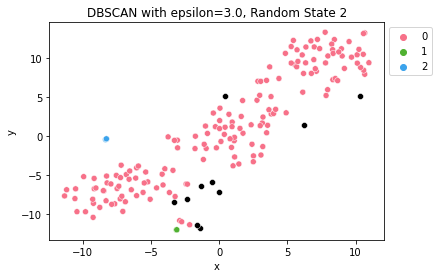

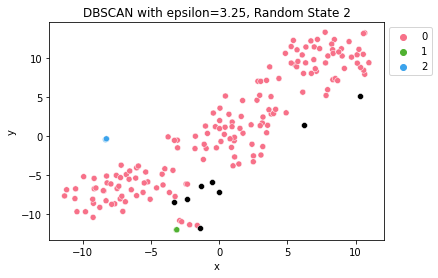

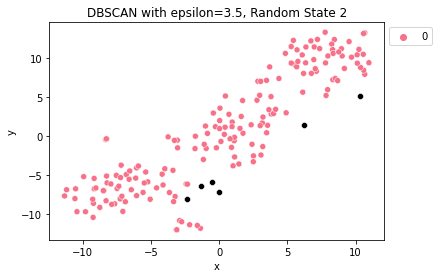

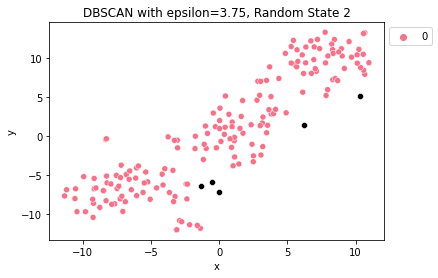

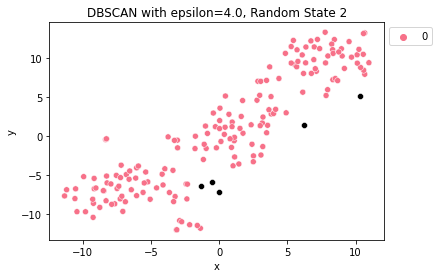

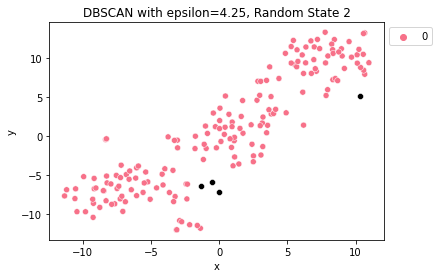

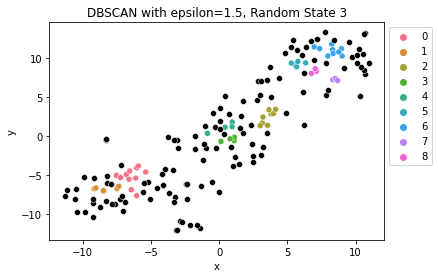

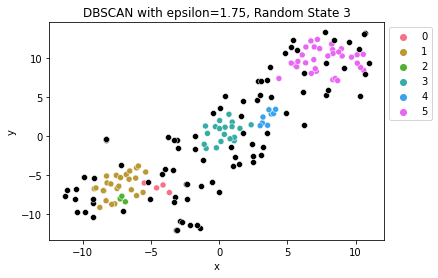

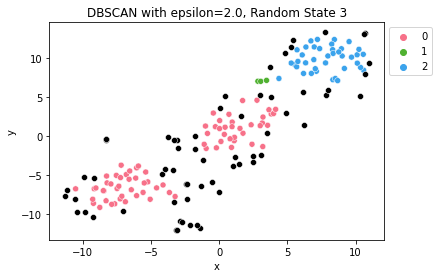

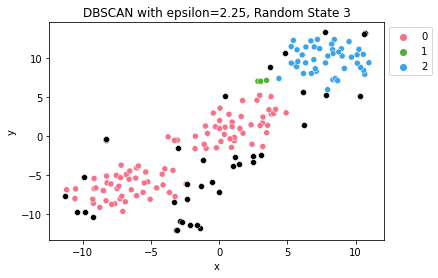

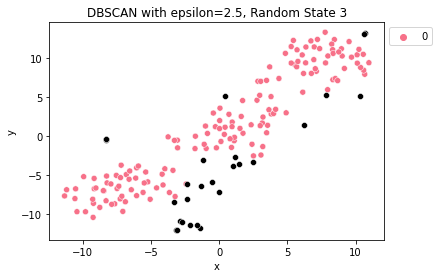

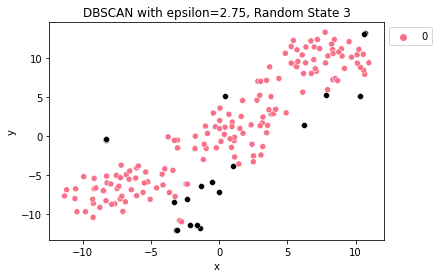

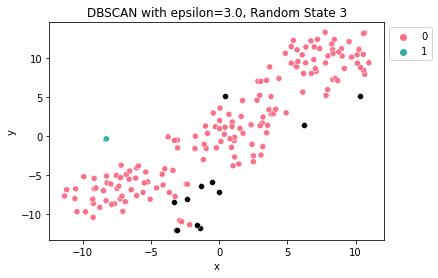

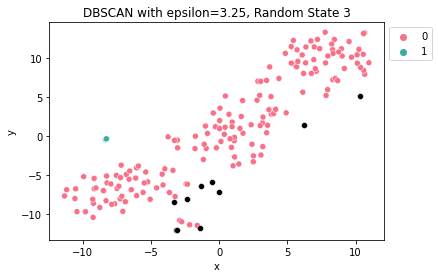

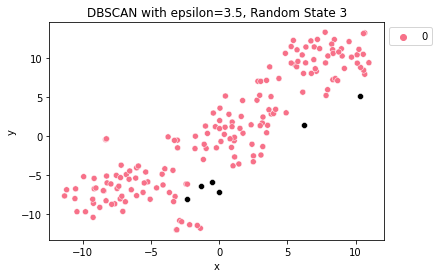

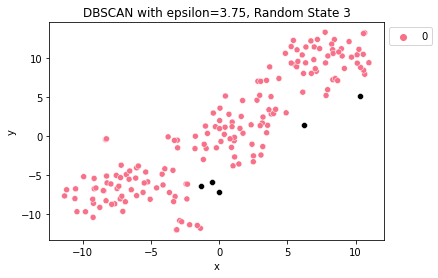

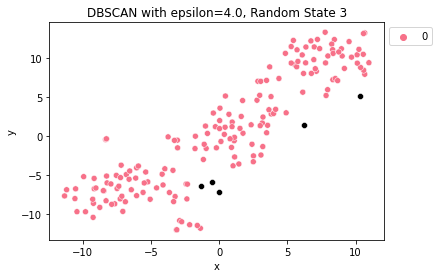

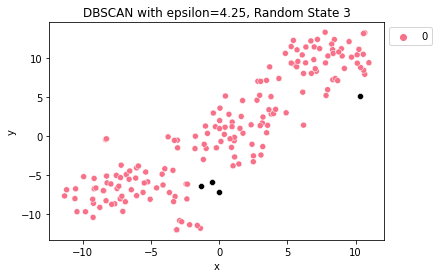

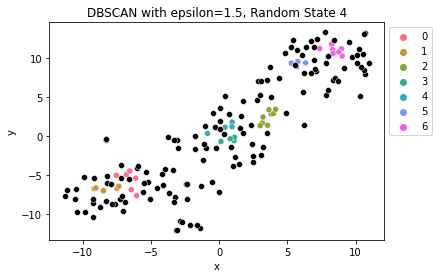

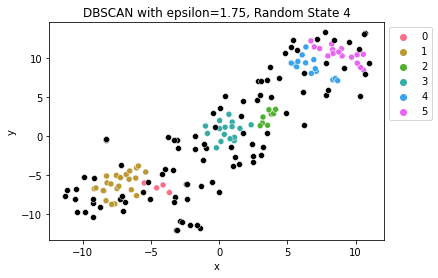

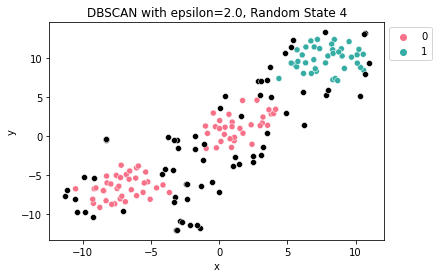

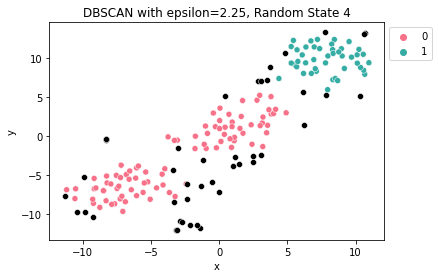

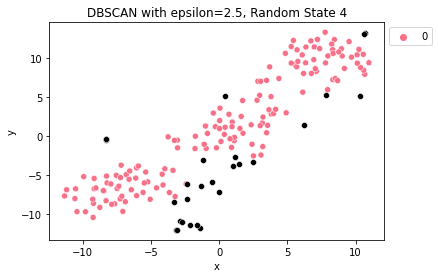

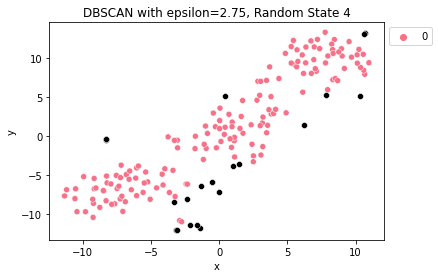

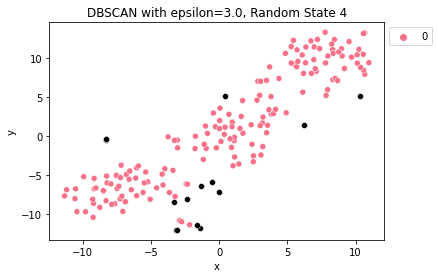

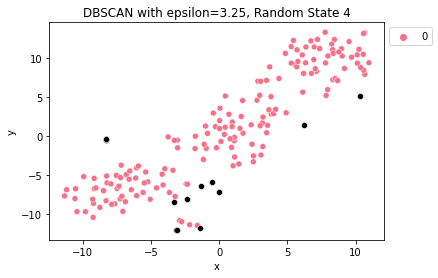

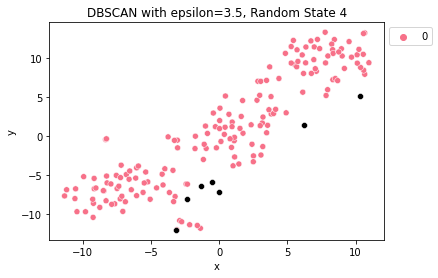

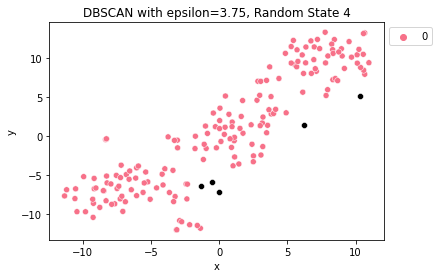

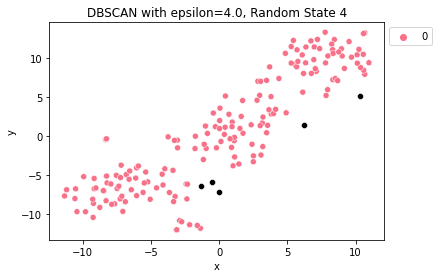

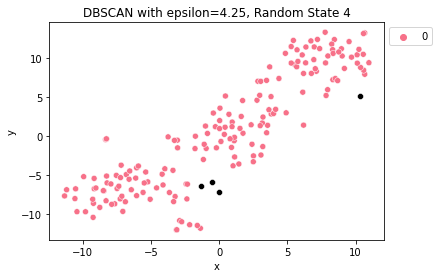

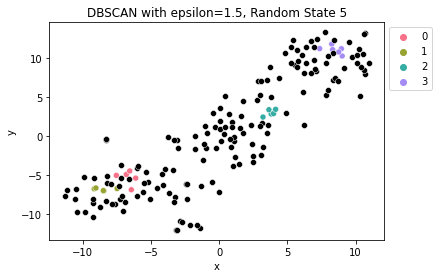

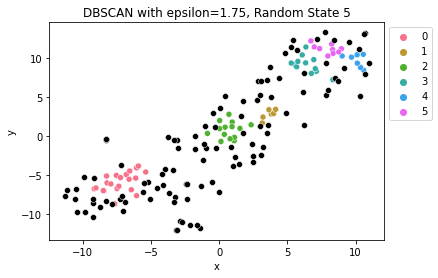

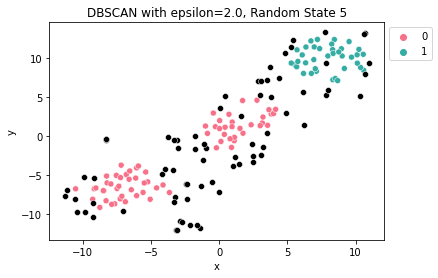

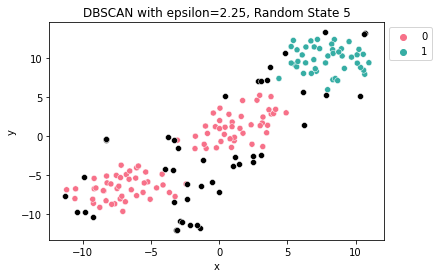

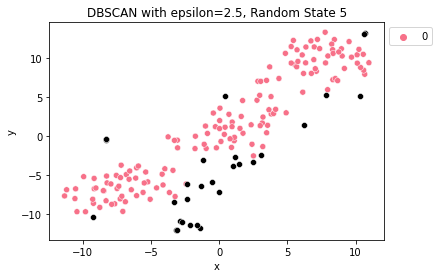

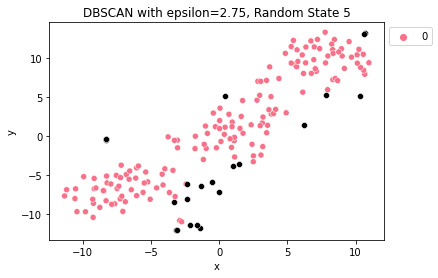

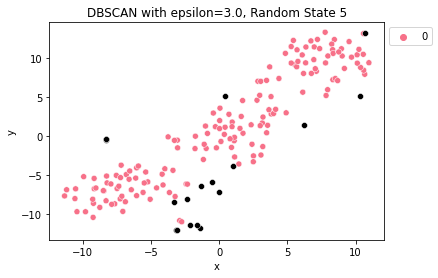

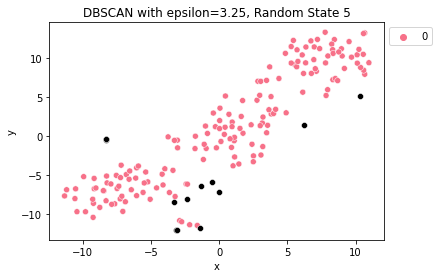

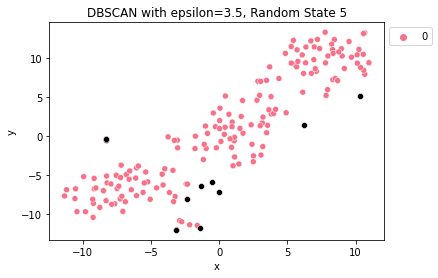

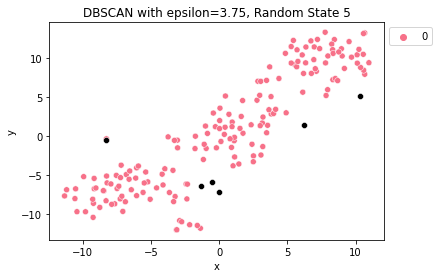

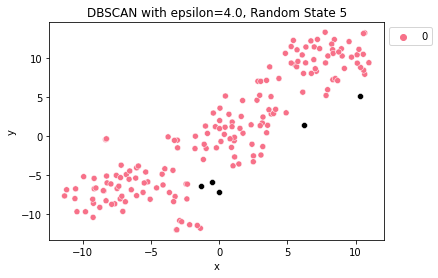

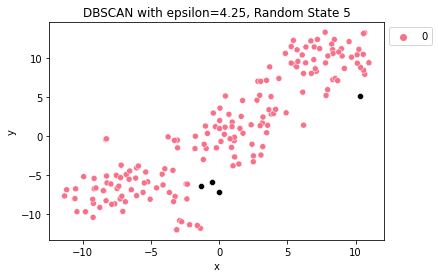

In [223]:
for minpts in [2, 3, 4, 5]:
    for eps in np.arange(1.5, 4.5, 0.25):
        dst = DBSCAN(eps=eps, min_samples=minpts, metric='euclidean')
        df_combo['predicted_cluster'] = dst.fit_predict(df_stand)        
        k = len(df_combo['predicted_cluster'].value_counts())
        sns.scatterplot(x='x',y='y', hue='predicted_cluster', 
                        palette = sns.color_palette("husl", k-1), data = df_combo[df_combo['predicted_cluster'] >= 0])
        sns.scatterplot(x='x',y='y', 
                        color='black', data = df_combo[df_combo['predicted_cluster'] == -1])
        plt.title('DBSCAN with epsilon=%s, Random State %s' %(eps, minpts))
        plt.legend(bbox_to_anchor=(1,1))
        plt.show()

No combination of minpts and epsilon values are ideal because even when we find plots with clusters of 3, their homogeneity don't agree with the wine class labels.

### 4.2.   k-Means: Algorithm Fit

List two reasons why this dataset might be a good fit for k-means (aside from the fact that this is a numerical dataset).

It is a good fit for k-means because each cluster has roughly the same number of objects and the clusters have about the same sparsity.


### 4.3. k-Means Clustering

#### 4.3.1.  Cluster the data

Cluster this dataset into the number of clusters that your t-SNE plots are suggesting. Then color code your clustering results on your t-SNE plot. Use a random state of 100.

In [207]:
kmeans = KMeans(n_clusters=3, random_state=100).fit(X)

df_stand['predicted_cluster']=kmeans.labels_
df_stand.head()

,Alcohol Content,Malic Acid,Ash,Alcalinity of Ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid Phenols,Proanthocyanins,Color Intensity,Hue,OD280 or OD315 of diluted wines,Proline,Wine Class,predicted_cluster
0,-0.064593,-0.257044,1.318068,1.653086,1.703265,0.536601,0.653312,0.871420,0.576613,-0.639377,0.179591,0.830961,0.264653,1,1
1,0.116245,0.227694,0.712585,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.000826,0.449601,-0.037874,1,1
2,0.154317,-0.625086,0.660686,-1.199622,0.720278,0.488531,0.653312,-0.176095,-0.404554,-0.198156,0.100140,0.237735,0.423878,1,1
3,0.715867,-0.391694,0.591488,-0.028510,0.509638,1.049347,0.944462,0.065639,0.296279,-0.241413,0.417944,1.113449,0.535335,1,1
4,1.125132,-0.373741,6.127336,0.151661,1.422412,0.808997,1.115136,-0.256673,0.664217,0.493956,0.060414,0.054117,1.697675,1,1


In [208]:
#Create the t-SNE plot projected coordinates
tsne = TSNE(n_components=2, perplexity=30, random_state=100)
data_tsne = tsne.fit_transform(X)
df_tsne = pd.DataFrame(data_tsne, columns=['x', 'y'])
df_combo = pd.concat([df, df_tsne], axis=1)


sns.scatterplot(x='x',y='y', hue='predicted_cluster', data=df_combo)
plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(20, 100))
plt.legend(bbox_to_anchor=(1,1))
plt.show()

ValueError: Could not interpret value `predicted_cluster` for parameter `hue`

#### 4.3.2 [1 pt] Interpretation:

For *this* case study, one of the goals of our cluster analysis is to find larger, naturally occuring clusters in the dataset and learn more about them. How well did k-means do in meeting this goal? Explain.

K means did a good job because it found all three distinct and well-seperated clusters. 

## 5. Post k-Means Cluster Analysis

### 5.1.Cluster Sorted Similarity Matrix

#### 5.1.1. Create it
Create a cluster sorted similarity matrix for this k-means clustering and your scaled dataset.

In [ ]:
df_stand = df[ ['Wine Class'] + [ col for col in df.columns if col != 'Wine Class' ] ]
df_stand

df_sort=df_stand.sort_values(by=['predicted_cluster'])
df_sort

In [ ]:
df_sort=df_sort.drop(['Wine Class', 'predicted_cluster'], axis=1)
df_sort

In [ ]:
#Create a distance matrix
dist_mat = squareform(pdist(df_sort))

#Then visualize the distance matrix with a heat map.
plt.pcolormesh(dist_mat)
plt.colorbar()
N = len(df_sort)
plt.xlim([0,N])
plt.ylim([0,N])
plt.show()

#### 5.1.2. Interpretation

Use this cluster sorted distance matrix to answer the following questions.

1. Which two clusters are furthest part? Explain.
2. Which cluster has the worst overall cohesion? Explain.
3. Does this matrix suggest that there might be some noise and/or outliers in this dataset? Explain.

1. Cluster 2 is furthest away from cluster 3 because if we look at the grid that is mostly green, we find that it corresponds to cluster 2 and 3. Also, Cluster 1 is furthest away from cluster 2 because if we look at the grid that is mostly green, we find that it corresponds to cluster 1 and 2.
2. Cluster 2 has the worst overall cohesion. The distance of the intra-cluster distances in the middle block are meshed with green and blue values. 
3. Yes, it does suggest that there are some noise and outliers because the blocks are meshed with blue and green upon further inspection, which suggest objects from different classes are overlapping with other objects from other classes.

### 5.2. Cluster Sorted Similarity Matrix Correlation

#### 5.2.1.  Calculate correlation coefficient
Scale this clusterted sorted similarity matrix (using the method we discussed in class) and calculate the correlation of this scaled matrix to the "ideal" scaled cluster sorted similarity matrix which has the same number of clusters and the same number of objects within each of these clusters.

In [ ]:
from scipy.linalg import block_diag

#Count the number of objects in each cluster, and sort by cluster label.
cluster_sizes=df_stand['predicted_cluster'].value_counts().sort_index()
print('Cluster Sizes')
print(cluster_sizes)
print()

#Create a list of square matrices with all ones, each matrix is the size of a cluster.
block_list=[]
for i in cluster_sizes:
    print('Cluster Size:',i)
    block=np.ones((i,i)).tolist()
    block_list.append(block)

#Put these square matrices on the block diagonal of an otherwise 0-matrix
print()
ideal_sim_mat=block_diag(block_list[0], block_list[1], block_list[2])
ideal_sim_mat

In [ ]:
#Then visualize the distance matrix with a heat map.
plt.pcolormesh(ideal_sim_mat)
plt.colorbar()
N = len(df_sort)
plt.xlim([0,N])
plt.ylim([0,N])
plt.show()

In [ ]:
#Find the maximum distance in the distance matrix
min_dist=np.min(dist_mat)
#"Find" the minimum distance in the distance matrix (this will be 0) from the diagonals... ie. the distance between an object and itself is 0.
max_dist=np.max(dist_mat)

#Similarity matrix
sim_mat=1-(dist_mat-min_dist)/(max_dist-min_dist)
sim_mat

In [ ]:
flat_sim_mat=sim_mat.flatten()
print('Flattened Actual Scaled Similarity Matrix')
print(flat_sim_mat)
    
flat_ideal_sim_mat=ideal_sim_mat.flatten()
print('Flattened Ideal Scaled Similarity Matrix')
print(flat_ideal_sim_mat)

In [ ]:
np.corrcoef(flat_sim_mat,flat_ideal_sim_mat)

#### 5.2.2.  Interpretation

Does this correlation coefficient suggest that this clustering has a very *high* amount of cohesion and separation? Explain.

A correlation of 0.41 is relatively low. This indicates that that the clustering that k-means found is not close to the "ideal cohesive and well-separated" clustering that had the same number of clusters and same number of objects within each cluster.

### 5.3 Pre-Assigned Class Label Association

#### 5.3.1. Homogeneity and Completeness
Calculate the homogeneity score, the completeness score, and the V-score between the Wine Class labels and the k-means clustering.

In [ ]:
from sklearn.metrics import homogeneity_score
homogeneity_score(df_stand['Wine Class'], df['predicted_cluster'])

In [ ]:
from sklearn.metrics import completeness_score
completeness_score(df_stand['Wine Class'], df['predicted_cluster'])

In [ ]:
from sklearn.metrics import v_measure_score
v_measure_score(df_stand['Wine Class'], df['predicted_cluster'])

#### 5.3.2.  Interpretation

1. Interpret your homogeneity score and your completeness score.

This high homogeneity score makes sense as the 3 clusters are mostly homogeneous with respect to the cluster labels.
This high completeness score makes sense as 3 class labels are close to being completely together in the same cluster.


2. In your t-SNE plot, color code the points by the k-means cluster labels and code the shape of points by the wine class labels. Does the homogeneity score and the completeness score that you just calculated agree with what you see in this t-SNE plot? Explain.

In [ ]:
sns.scatterplot(x='x',y='y', hue='Wine Class', style='predicted_cluster', data=df_combo)
plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(20, 2))
plt.legend(bbox_to_anchor=(1,1))
plt.show()

From the plot above, we can see the following.

* All the clusters are mostly homogenous with respect to cluster labels.
* The three classes (Wine Class 1, 2, and 3) are mostly completely together in the same cluster.
